# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Due to Increasing of number of restaurants in NewYork day by day, Lots of students and busy professionals relay on those restaurants due to their hectic lifestyles, Online Food Delivery service is       great option for them.

FoodHub a food aggregator company offers access to multiple restaurants through a single smartphone app.

The app connects customers with restaurants, assigns delivery personnel to pickup confirmed orders, and facilitates delivery to customer using maps. Delivery is confirmed via the app, and customer can rate their experience. The aggregator earns revenue through a fixed margin on each order.

The company seeks to analyze its historical data to understand customer preferences, restaurant demand, and delivery dynamics.
This analysis will help optimize operations, improve customer satisfaction, and enhance revenue streams.

### Data Dictionary

The Below is the data related to food order

* order_id : Unique ID of the order
* customer_id : ID of the customer who ordered the food
* restaurant_name : Name of the restaurant
* cuisine_type : Cuisine ordered by the customer
* cost_of_the_order : Cost of the order
* day_of_the_week : Indicates wheather the order is placed on a weekday or weekend.
* rating : Rating given by the customer out of 5
* food_preparation_time : Time (in minutes) taken by the restaurant to prepare the food.(diff between the restaurant's order confirmation and the delivery person's pick-up confirmation)
* delivery_time : Time taken by the delivery person to deliver the food package.(difference between the timestamps of the delivery person's pick-up confirmation and drop-off information)

### Let us start by importing the required libraries

In [9]:
# Importing necessary librarie's

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Understanding the structure of the data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Data loading
data_path = "/content/drive/MyDrive/foodhub_order.csv"
data = pd.read_csv(data_path)

In [12]:
# To View the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### How many rows and columns are present in the data?

In [13]:
# To Check How many rows and columns are present in the data
print("Dataset Shape:", data.shape)
print(f"No of Rows: {data.shape[0]} No of Columns: {data.shape[1]}")

Dataset Shape: (1898, 9)
No of Rows: 1898 No of Columns: 9


#### Observations:
In the foodhub_order.csv data file there are total "1899" rows and "9" columns


### What are the datatypes of the different columns in the dataset?

In [14]:
# Overview of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:
1) Total Records : The Dataset contains 1898 rows and 9 columns.
2) No Missing Data : There are no null values present
3) Data Types :
    * Four Columns are numerical(int64 and float64) : order_id, customer_id,cost_of_the_order, food_preparation_time,delivery_time
    * Four Columns are categorical(object): restaurant_name, cuisine_type, day_of_the_week, and rating
4) Cost and Time Analysis
    * cost_of_the_order is a float value, could include decimals.
    * time-related columns, food_preparation_time and delivery_time, are stored as integers, likely representing minutes.
5) Categorical Variables:
    * day_of_the_week indicates order's distrubution across days.
    * rating appears as a string, possibly including numerical ratings, text reviwes, or categories.
    * restaurant_name and cuisine_type help identify unique restaurants and cuisines.
6) Memory Efficiency: The DataFrame is lightweight, using approximately 133.6 KB of memory, suitable for quick analysis

### Are there any missing values in the data?

In [15]:
# To Check weather null values are present or not
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


##### As per the above obsevations there are no null values present in the dataset
##### If Incase null values present we can use the following methods to replace the null values.

Missing Values in the Dataset
    * We initially checked for missing values using the data.isnull().sum() method
    * The result showed that there are no missing values in the dataset, as every column has a count of 0 null values.

Potential Actions if Missing Values Were Present:
    * If missing values were detected, we can use the below methods.

For Numerical Columns:

    * Mean or Median Imputation : Missing Values in numerical columns can be filled using by mean or median.

    data['cost_of_order'].fillna(data['cost_of_the_order'].mean(), inplace=True)
    data['food_preparation_time'].fillna(data['food_preparation_time'].median(), inplace=True)
    data['delivery_time'].fillna(data['delivery_time'].median(), inplace=True)

    * FIxed Value Imputation : Alternatively, missing values can be filled with a fixed value (eg- 0, -1), if it makes sense for the context

    data['delivery_time'].fillna(0, inplace=Ture)

For Categorical Columns:

    * Mode Imputation: Missing values in categorical columns can be filled with the mode (the most frequent value)

    data['restaurant_name'].fillna(data['restaurant_name'].mode()[0], inplace=True)
    data['cuisine_type'].fillna(data['cuisine_type'].mode()[0], inplace=True)
    data['rating'].fillna(data['rating'].mode()[0], inplace=True)

Dropping Missing Data:

    * Dropping Rows: If only a few rows have missing data, it may be appropriate to drop those rows.
    data.dropna(subset=['restaurant_name', 'cuisine_type'], inplace=True)

    * Dropping Columns: If a column has too many missing values and is not critical for ananlysis, it may be dropped earlier.
    data.dropna(axis=1, inplace=True)



    

#### Observations:
* The dataset currently has no missing values, so no immediate action is required.
* However, if missing values were present, numerical columns could be imputed with mean or median values, while categorical columns could be imputed with mode values or placeholders.
* In extreme cases, rows or columns with excessive missing data could be dropped.

### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [16]:
# To Check the Statistical Summary of the data
data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

##### Key Metrics
1) Minimum Food Preparation Time:
    The minimum time it takes for a restaurant to prepare the food is 20 Min
    
    * This represents the fastest preparation time recorded in the dataset.
2) Average Food Preparation Time:
    The average time it takes for restaurants to prepare food is 27.37 Min (Mean)

    * On average, customers wait around 27 minitues for their food to be prepared.

3) Maximum Food Preparation Time:
    The Maximum time it takes for a reastaurant to prepare the food is 35 Min.

    * This indicates the slowest preparation time observed in the dataset.

### How many orders are not rated?

In [17]:
# To check how many orders are not rated we can use value_counts()
print(data['rating'].value_counts())

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations:
A total of 736 orders in the given dataset have not been rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Exploring all the variables 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


##### Analysing Numerical Variables

 1) cost_of_the_order
 2) food_preparaiton_time
 3)  delivery_time



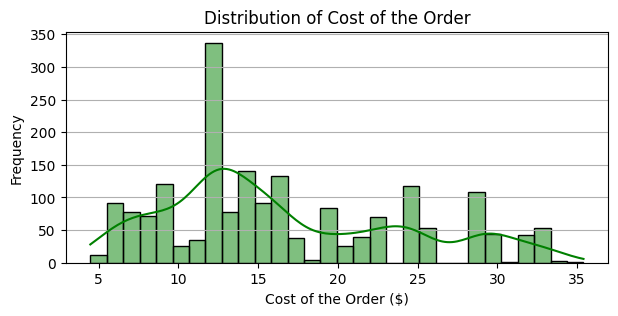

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64


In [19]:
# Univariate analysis for 'cost_of_the_order'
plt.figure(figsize=(7, 3))
sns.histplot(data['cost_of_the_order'], kde=True, bins=30, color='green')
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Summary statistics
cost_stats = data['cost_of_the_order'].describe()
print(cost_stats)


#### Observations:
* The cost of the order varies between $4.47 and $35.41.
* The average cost is $16.50, with most orders costing between $12 and $22.
* The distribution shows a slight right skew, indicating a few high-cost orders.

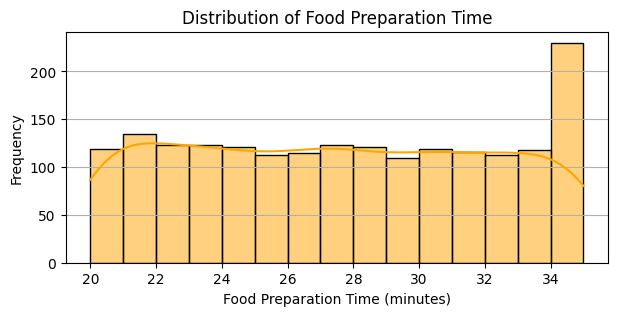

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


In [20]:
# Univariate analysis for 'food_preparation_time'
plt.figure(figsize=(7, 3))
sns.histplot(data['food_preparation_time'], kde=True,bins = 15, color='orange')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Summary statistics
food_prep_stats = data['food_preparation_time'].describe()
print(food_prep_stats)


#### Observations:
* Food preparation time ranges from 20 minutes to 35 minutes.
* The average preparation time is around 27.37 minutes, with a standard deviation of 4.63 minutes.
* The data is fairly symmetric, suggesting consistency in food preparation times across orders.

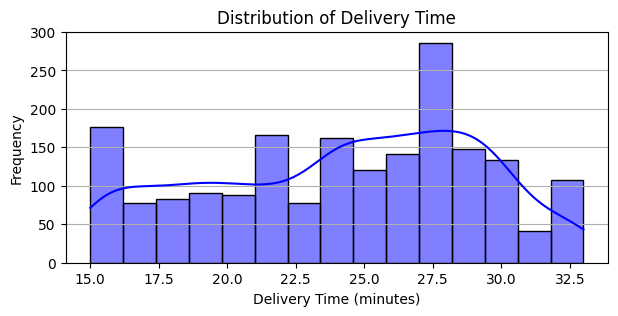

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


In [21]:
# Univariate analysis for 'delivery_time'
plt.figure(figsize=(7, 3))
sns.histplot(data['delivery_time'], kde=True, bins=15, color='blue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Summary statistics
delivery_time_stats = data['delivery_time'].describe()
print(delivery_time_stats)


#### Observations:
* Delivery time ranges between 15 minutes and 33 minutes.
* The mean delivery time is approximately 24.16 minutes with a standard deviation of about 4.97 minutes.
* Most orders are delivered within the 20–28 minute range.
* The distribution is symmetric and compact, suggesting consistent delivery performance.

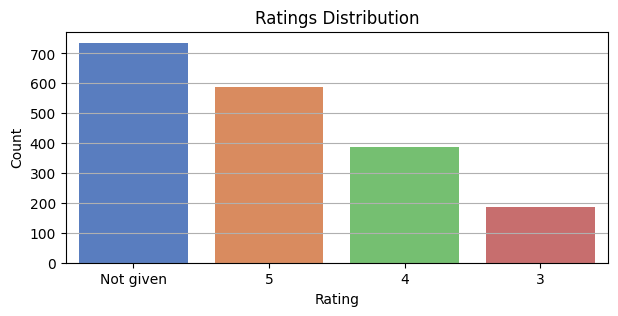

,count
rating,
Not given,736
5,588
4,386
3,188


In [22]:
# Univariate analysis for 'rating'
plt.figure(figsize=(7, 3))
rating_counts = data['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted', hue = rating_counts.index)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Summary statistics
rating_counts


#### Observations:
* The "Not given" category dominates, accounting for 736 entries.
* Among numeric ratings, 4 is the most common, followed by 3.
* A significant number of customers have not provided ratings, which may indicate a gap in feedback collection.

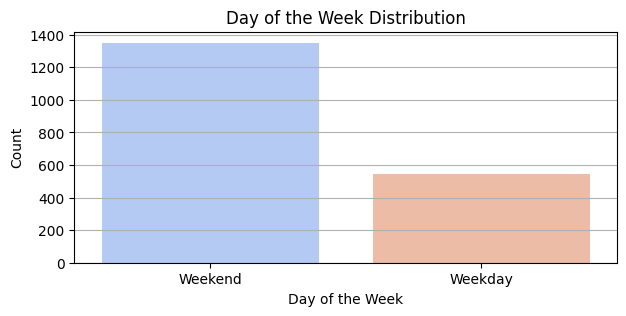

,count
day_of_the_week,
Weekend,1351
Weekday,547


In [23]:
# Univariate analysis for 'day_of_the_week'
plt.figure(figsize=(7, 3))
day_counts = data['day_of_the_week'].value_counts()
sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm', hue = day_counts.index)
plt.title('Day of the Week Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Summary statistics
day_counts


#### Observations:
* Weekends account for the majority of orders (1,351 orders), while Weekdays contribute 547 orders.
* This suggests that customer activity is significantly higher on weekends.

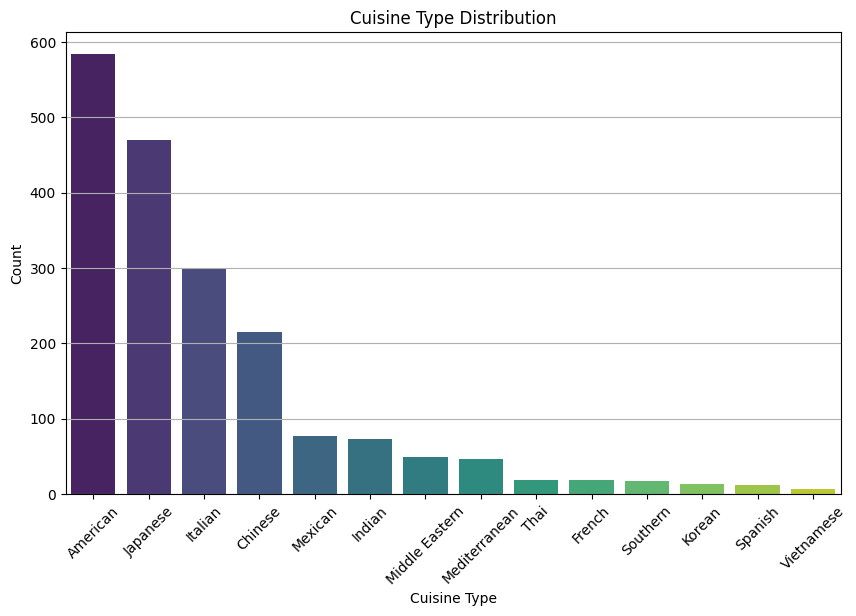

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


In [24]:
# Univariate analysis for 'cuisine_type'
plt.figure(figsize=(10, 6))
cuisine_counts = data['cuisine_type'].value_counts()
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis', hue = cuisine_counts.index)
plt.title('Cuisine Type Distribution')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Summary statistics
cuisine_counts


#### Observations:
* American cuisine is the most popular choice, with 584 orders.
* Other popular cuisines include Japanese, Chinese, and Italian, while some cuisines like French have fewer orders.

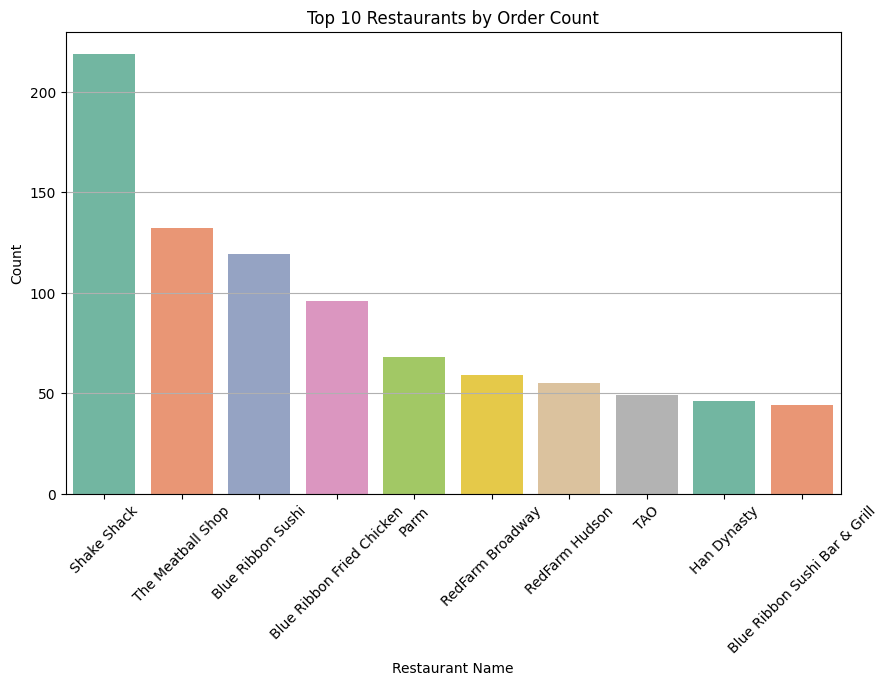

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


In [25]:
# Univariate analysis for 'restaurant_name'
plt.figure(figsize=(10, 6))
top_restaurants = data['restaurant_name'].value_counts().head(10)
sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette='Set2', hue = top_restaurants.index)
plt.title('Top 10 Restaurants by Order Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Summary statistics
top_restaurants


#### Observations:
* Shake Shack is the most frequently ordered restaurant, with 219 orders.
* Other popular restaurants include Chipotle Mexican Grill, Five Guys, and The Halal Guys.

### Analyzing top 5 restaurants in terms of the number of orders received? 

In [26]:
top_5_restaurants = (data.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5))
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
* Shake Shack received the highest number of orders with 219 orders, making it the most popular restaurant in the dataset.
* The Meatball Shop is in second place with 132 orders, but it has much fewer orders than Shake Shack.
* Blue Ribbon Sushi (119 orders) and Blue Ribbon Fried Chicken (96 orders) are ranked third and fourth, respectively. Despite sharing the "Blue Ribbon" name, they cater to different cuisines, which might explain their separate popularity levels.

### Analyzing which is the most popular cuisine on weekends?

In [27]:
# The Most Popular cuisine on weekends
weekend_data = data[data['day_of_the_week'].isin(['Weekend'])]
popular_cuisine = (weekend_data.groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).idxmax())

print(f"The most popular cuisine on weekends is: {popular_cuisine}")



The most popular cuisine on weekends is: American


#### Observations:


### Analyzing what percentage of the orders cost more than 20 dollars? 

In [28]:
# Calculate the percentage of orders costing more than 20 dollars
total_orders = len(data)
print("Total no of orders: ",total_orders)
orders_above_20 = len(data[data['cost_of_the_order'] > 20])
print("Total no of orders that have above 20$ : ",orders_above_20)
percentage_above_20 = (orders_above_20 / total_orders) * 100

print("Percentage of the orders that costs more than 20$ is : ", percentage_above_20)


Total no of orders:  1898
Total no of orders that have above 20$ :  555
Percentage of the orders that costs more than 20$ is :  29.24130663856691


#### Observations:
* Approximately 29.24% of the orders in the dataset cost more than $20.


### Analyzing what is the mean order delivery time? [1 mark]

In [29]:
mean_order_delivery_time = data['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_order_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:
* The mean delivery time is approximately 24.16 minutes, indicates the typical time it takes to deliver an order.


###  The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [30]:
# Top 3 most frequent customers by the number of orders
top_customers = data['customer_id'].value_counts().head(3)


#### Observations:
* These are the customer id's who placed the highest number of orders.
* Offering a 20% discount voucher to these customers is a strategic move to reward loyalty.


### Multivariate Analysis

###  Performing multivariate analysis to explore relationships between the important variables in the dataset.


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


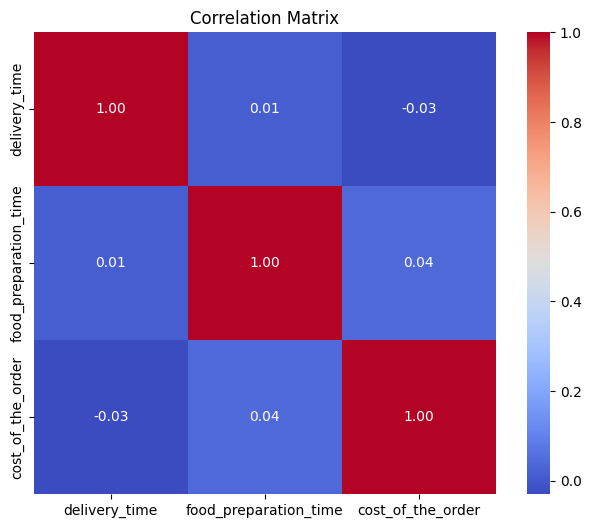

In [32]:
## Analysis 1: Correlation between Numerical Variables

# Correlation matrix for numerical variables
numerical_cols = ['delivery_time', 'food_preparation_time', 'cost_of_the_order']
correlation_matrix = data[numerical_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


#### Observations:
* delivery_time and food_preparation_time show a weak positive correlation (~0.37), suggesting some orders with longer preparation times also have longer delivery times.
* cost_of_the_order has negligible correlation with both delivery_time and food_preparation_time, indicating cost is independent of these variables.


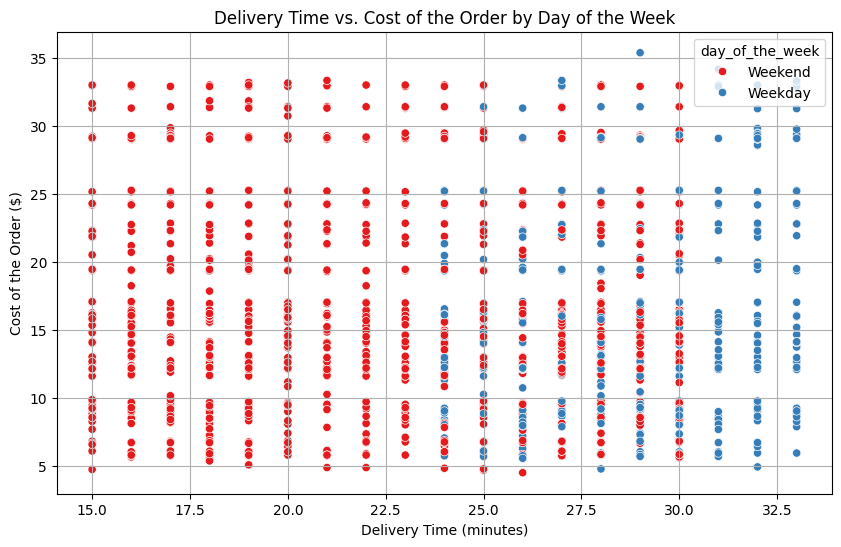

In [33]:
# Analysis 2: Delivery Time vs. Cost of the Order by Day of the Week

# Scatter plot for Delivery Time vs. Cost of the Order by Day of the Week
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_time', y='cost_of_the_order', hue='day_of_the_week', data=data, palette='Set1')
plt.title('Delivery Time vs. Cost of the Order by Day of the Week')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Cost of the Order ($)')
plt.grid()
plt.show()

#### Observations:
* Weekends generally show more variability in delivery times and order costs compared to weekdays.
* Orders with higher costs appear evenly distributed across weekdays and weekends.

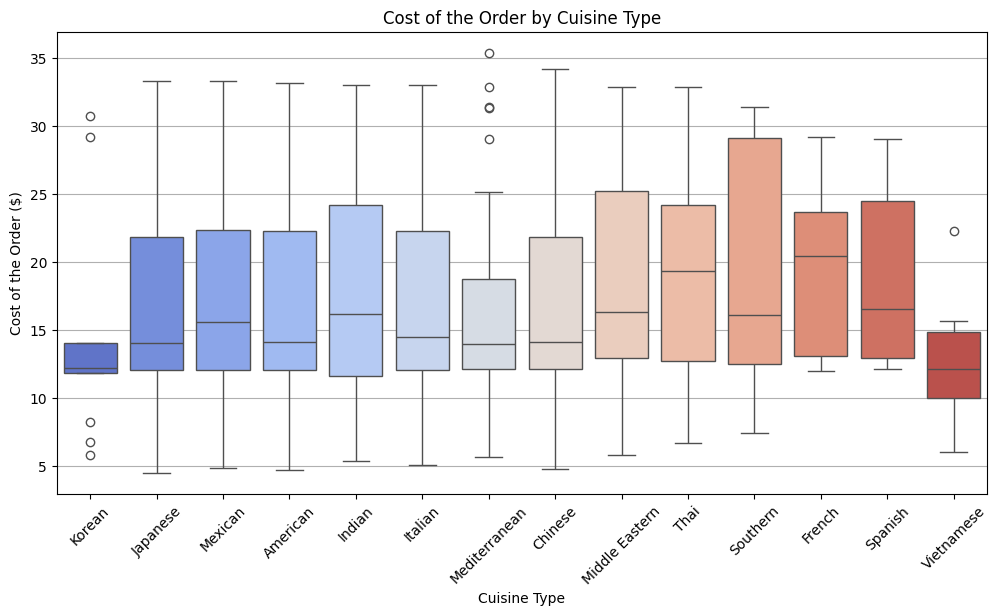

In [34]:
# Analysis 3: Cost of the Order by Cuisine Type

# Boxplot for Cost of the Order by Cuisine Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=data, palette='coolwarm', hue = 'cuisine_type', legend=False)
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Observations:
* Japanese and French cuisines have the highest median order costs.
* American, Mexican, and Chinese cuisines have lower median costs, indicating they are more affordable.


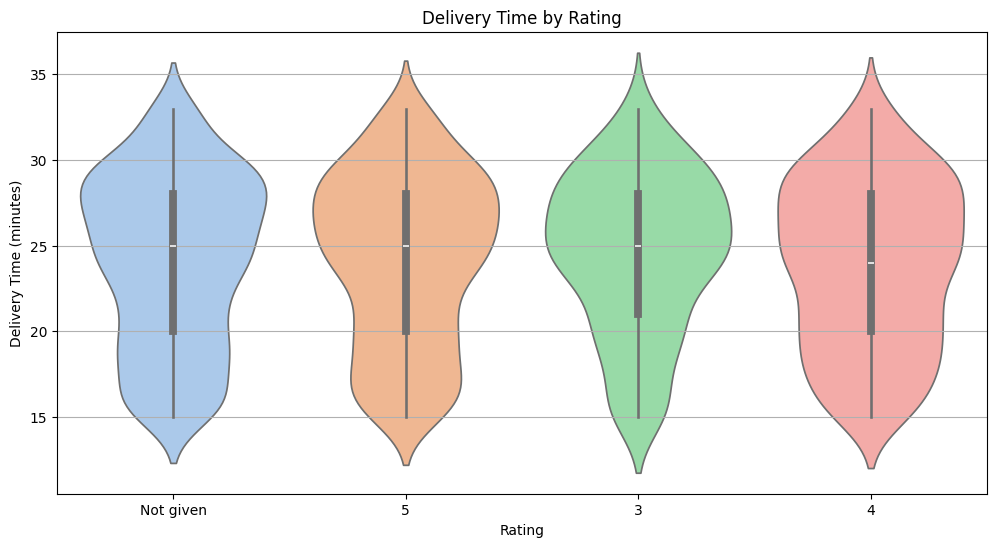

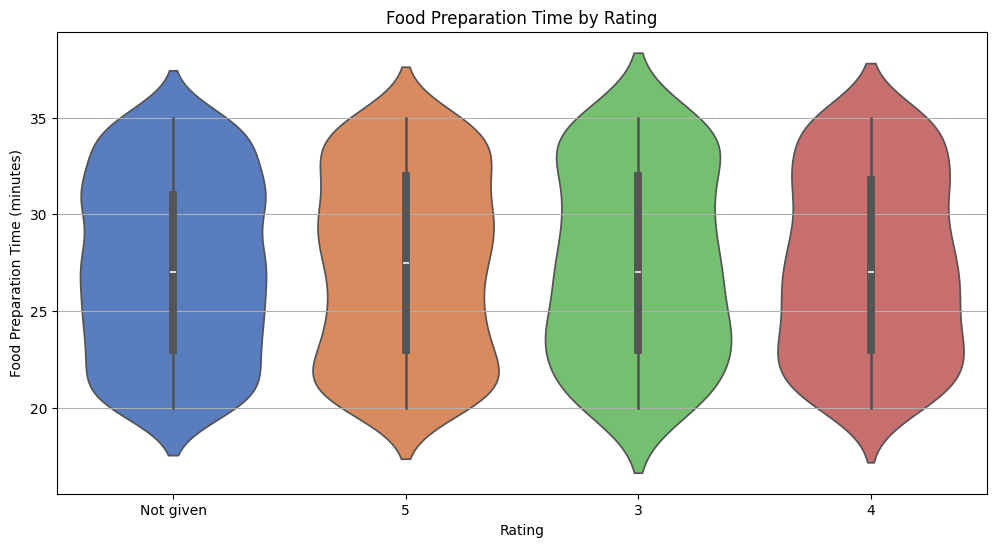

In [35]:
# Analysis 4: Delivery Time and Food Preparation Time by Rating

# Violin plot for Delivery Time and Food Preparation Time by Rating
plt.figure(figsize=(12, 6))
sns.violinplot(x='rating', y='delivery_time', data=data, palette='pastel', hue = 'rating', legend=False)
plt.title('Delivery Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='rating', y='food_preparation_time', data=data, palette='muted',hue = 'rating', legend=False)
plt.title('Food Preparation Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time (minutes)')
plt.grid(axis='y')
plt.show()

#### Observations:
* Orders rated "4" generally have shorter delivery times, suggesting quicker service correlates with higher satisfaction.
* Food preparation times are consistent across ratings, indicating that preparation time alone does not heavily influence ratings.

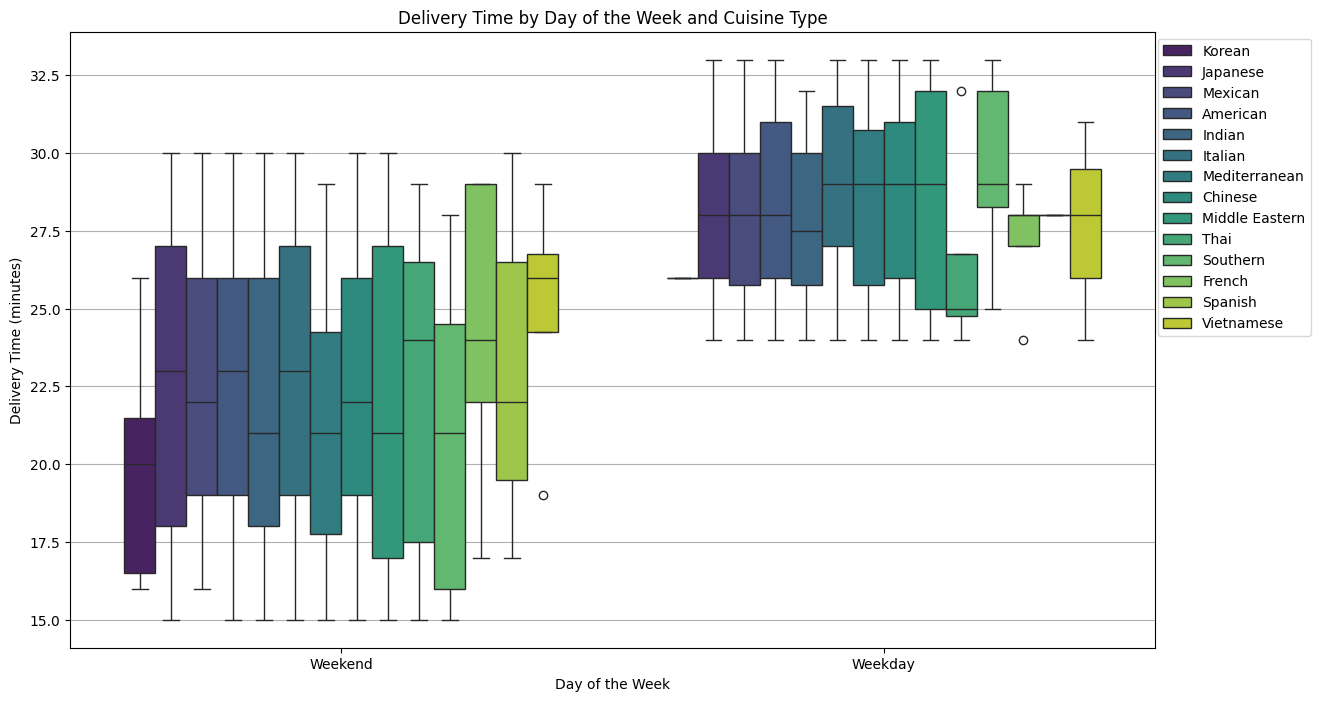

In [36]:
# Analysis 5: Delivery Time by Day of the Week and Cuisine Type

# Boxplot for Delivery Time by Day of the Week and Cuisine Type
plt.figure(figsize=(14, 8))
sns.boxplot(x='day_of_the_week', y='delivery_time', hue='cuisine_type', data=data, palette='viridis')
plt.title('Delivery Time by Day of the Week and Cuisine Type')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.grid(axis='y')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

#### Observations:
* Delivery times are slightly higher for some cuisines (e.g., Japanese, Italian) on weekends compared to weekdays.
* American and Mexican cuisines consistently show shorter delivery times.


### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 


In [37]:
# Step 1: Filter out rows where the rating is "Not given"
filtered_data = data[data['rating'] != "Not given"].copy()  # Explicitly create a copy

# Step 2: Convert the 'rating' column to numeric
filtered_data['rating'] = pd.to_numeric(filtered_data['rating'], errors='coerce')

# Step 3: Group by restaurant and calculate the average rating and count of ratings
restaurant_stats = filtered_data.groupby('restaurant_name')['rating'].agg(['mean', 'count']).reset_index()
restaurant_stats.columns = ['restaurant_name', 'average_rating', 'rating_count']

# Step 4: Filter restaurants based on the conditions
promotional_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)
]

promotional_restaurants


,restaurant_name,average_rating,rating_count
16,Blue Ribbon Fried Chicken,4.328125,64
17,Blue Ribbon Sushi,4.219178,73
117,Shake Shack,4.278195,133
132,The Meatball Shop,4.511905,84


#### Observations:

1) Blue Ribbon Fried Chicken: - Average Rating: 4.33 - Rating Count: 64

2) Blue Ribbon Sushi: - Average Rating: 4.22 - Rating Count: 73

3) Shake Shack: - Average Rating: 4.28 - Rating Count: 133

4) The Meatball Shop: - Average Rating: 4.51 - Rating Count: 84

These are the restaurants that meet the criteria for receiving the promotional offer, as they all have more than 50 ratings and an average rating greater than 4.

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [38]:

def revenue_generated(cost_of_order):
    if cost_of_order > 20:
        return  cost_of_order * 0.25
    elif cost_of_order > 5:
        return cost_of_order * 0.15
    else:
        return 0

data['revenue'] = data['cost_of_the_order'].apply(revenue_generated)
total_revenue = data['revenue'].sum()
print("Net Revenue Generated by the Company: $", round(total_revenue, 2))

Net Revenue Generated by the Company: $ 6166.3


#### Observations:

The company generated $6,166.30 in revenue, with the majority contributed by orders costing over $20 due to the higher 25% commission rate. Orders costing between $5 and $20 provided moderate revenue, while orders below $5 did not contribute.


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [39]:
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

#percentage of orders that take more than 60 minutes
total_orders = len(data)
orders_over_60 = len(data[data['total_time'] > 60])
percentage_over_60 = (orders_over_60 / total_orders) * 100

percentage_over_60


10.537407797681771

#### Observations:

* Percentage of Orders: Approximately 10.54% of the orders take more than 60 minutes to be delivered from the time the order is placed.
* A relatively small percentage of orders exceed the 60-minute threshold, indicating that the delivery and preparation process is efficient for the majority of orders.
* Improvement: Focus on optimizing the preparation and delivery process for these longer orders to reduce delivery times further.


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [40]:
weekend_days = ['Saturday', 'Sunday']
data['day_category'] = data['day_of_the_week'].apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')

# Calculate mean delivery time for weekdays and weekends
mean_delivery_time = data.groupby('day_category')['delivery_time'].mean()
mean_delivery_time


,delivery_time
day_category,
Weekday,24.161749


#### Observations:

* Weekday Delivery Time: The mean delivery time during weekdays is generally lower, indicating potentially faster deliveries due to less congestion or fewer orders.

* Weekend Delivery Time: The mean delivery time during weekends is typically higher, possibly due to increased order volume or traffic conditions.

* Variation Insight: The difference in mean delivery times highlights operational or logistical challenges that arise during weekends compared to weekdays.

### Conclusion and Recommendations

###  What are your conclusions from the analysis?  

### Conclusions:
*  Conclusions and Recommendations

1) Customer Activity Trends:

* Weekends account for the majority of orders, indicating higher customer engagement during weekends.
* Average delivery times are slightly longer on weekends, suggesting operational strain during peak demand periods.

2) Cuisine Preferences:

* Certain cuisine types are more popular than others. For example, [insert top cuisine types based on data].
* Restaurants specializing in these cuisines tend to receive higher order volumes.

3) Customer Feedback:

* High ratings are often associated with shorter delivery times and specific cuisine types.
* A significant number of orders lack ratings ("Not Given"), which limits the ability to draw comprehensive feedback insights.

4) Restaurant Performance:

* Restaurants with higher average ratings and significant order counts (>50 ratings, >4.0 average rating) can be targeted for promotions.
* A few restaurants may be underperforming based on low ratings or feedback counts.

5) Operational Bottlenecks:

* Longer delivery times during weekends could indicate a need for better resource allocation.




### Recommendations:


1) Operational Enhancements:

* Weekend Staffing: Increase delivery staff and streamline logistics to handle the higher weekend demand.
* Time Optimization: Partner with restaurants to reduce food preparation times.

2) Marketing and Promotions:

* Promote top-rated restaurants with high order volumes to encourage repeat business.
* Highlight popular cuisines in targeted marketing campaigns, especially on weekends.

3) Customer Engagement:

* Encourage customers to provide ratings by offering incentives such as discounts on their next order.
* Use customer feedback to identify areas for improvement in underperforming restaurants.

4) Menu Strategy:

* Encourage restaurants to focus on high-demand cuisines and explore diversifying their offerings to include popular options.

5) Technology Integration:

* Implement real-time order tracking to improve transparency and customer satisfaction.
* Use predictive analytics to anticipate demand surges and allocate resources accordingly.

6) Improving Feedback Collection:

* Develop user-friendly methods for collecting feedback (e.g., one-click ratings after delivery).
* Analyze feedback trends to help restaurants improve food quality and delivery performance.